In [109]:
import pandas as pd
import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Creating our DataFrame and  looking at datatypes, basic statistics, and `NULL` values

In [182]:
df = pd.read_csv('data/633140530_T_ONTIME.csv')
df.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
0,1,1,7,6,2017-01-07,AA,19805,AA,10721,1072102,...,NaN,411.0,432.0,366.0,0.0,7.0,21.0,0.0,0.0,NaN
1,1,1,8,7,2017-01-08,AA,19805,AA,10721,1072102,...,NaN,411.0,414.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,9,1,2017-01-09,AA,19805,AA,10721,1072102,...,NaN,412.0,414.0,392.0,27.0,0.0,2.0,0.0,0.0,NaN
3,1,1,10,2,2017-01-10,AA,19805,AA,10721,1072102,...,NaN,412.0,429.0,390.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,11,3,2017-01-11,AA,19805,AA,10721,1072102,...,NaN,412.0,444.0,405.0,0.0,0.0,25.0,0.0,0.0,NaN


In [183]:
df.shape

(450017, 30)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 30 columns):
QUARTER                  450017 non-null int64
MONTH                    450017 non-null int64
DAY_OF_MONTH             450017 non-null int64
DAY_OF_WEEK              450017 non-null int64
FL_DATE                  450017 non-null object
UNIQUE_CARRIER           450017 non-null object
AIRLINE_ID               450017 non-null int64
CARRIER                  450017 non-null object
ORIGIN_AIRPORT_ID        450017 non-null int64
ORIGIN_AIRPORT_SEQ_ID    450017 non-null int64
ORIGIN_CITY_MARKET_ID    450017 non-null int64
ORIGIN_CITY_NAME         450017 non-null object
DEST_AIRPORT_ID          450017 non-null int64
DEST_AIRPORT_SEQ_ID      450017 non-null int64
DEST_CITY_MARKET_ID      450017 non-null int64
DEP_DELAY_NEW            441476 non-null float64
DEP_DEL15                441476 non-null float64
ARR_DELAY_NEW            439645 non-null float64
ARR_DEL15                439645 n

In [186]:
### Filling our null values for departure length
df.DEP_DELAY_NEW.fillna(0.0, inplace=True)
df.ARR_DELAY_NEW.fillna(0.0, inplace=True)

In [187]:
# exclude_list=['QUARTER', 'AIRLINE_ID', 'ORIGIN_AIRPORT_ID',
#                      'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
#                      'DEST_CITY_MARKET_ID']

stats_df = df.describe(include=[float]).T

skew_values = []
for i in stats_df.index:

    col_skew = stats.skew(df[i])
    skew_values.append(col_skew)
    
stats_df['Skew'] = skew_values    
stats_df

,count,mean,std,min,25%,50%,75%,max,Skew
DEP_DELAY_NEW,450017.0,14.773015,45.800003,0.0,0.0,0.0,9.0,2755.0,9.747164
DEP_DEL15,441476.0,0.210820,0.407891,0.0,0.0,0.0,0.0,1.0,NaN
ARR_DELAY_NEW,450017.0,15.065384,45.291288,0.0,0.0,0.0,11.0,1944.0,9.306289
ARR_DEL15,439645.0,0.222222,0.415740,0.0,0.0,0.0,0.0,1.0,NaN
CANCELLED,450017.0,0.019746,0.139126,0.0,0.0,0.0,0.0,1.0,6.903877
CRS_ELAPSED_TIME,450013.0,147.936311,77.132200,21.0,90.0,130.0,181.0,712.0,NaN
ACTUAL_ELAPSED_TIME,439645.0,143.172273,76.701789,16.0,86.0,125.0,176.0,734.0,NaN
AIR_TIME,439645.0,118.427863,74.529136,7.0,63.0,100.0,150.0,704.0,NaN
CARRIER_DELAY,97699.0,20.308836,60.649157,0.0,0.0,0.0,17.0,1934.0,NaN
WEATHER_DELAY,97699.0,3.368857,27.809756,0.0,0.0,0.0,0.0,1934.0,NaN


    - Our Departure Delay length feature is highllys skewed, as is Arrival Delay.  Highly correlated features.

In [188]:
for i in df:
    print(i, df[i].isnull().sum())
    

('QUARTER', 0)
('MONTH', 0)
('DAY_OF_MONTH', 0)
('DAY_OF_WEEK', 0)
('FL_DATE', 0)
('UNIQUE_CARRIER', 0)
('AIRLINE_ID', 0)
('CARRIER', 0)
('ORIGIN_AIRPORT_ID', 0)
('ORIGIN_AIRPORT_SEQ_ID', 0)
('ORIGIN_CITY_MARKET_ID', 0)
('ORIGIN_CITY_NAME', 0)
('DEST_AIRPORT_ID', 0)
('DEST_AIRPORT_SEQ_ID', 0)
('DEST_CITY_MARKET_ID', 0)
('DEP_DELAY_NEW', 0)
('DEP_DEL15', 8541)
('ARR_DELAY_NEW', 0)
('ARR_DEL15', 10372)
('CANCELLED', 0)
('CANCELLATION_CODE', 441131)
('CRS_ELAPSED_TIME', 4)
('ACTUAL_ELAPSED_TIME', 10372)
('AIR_TIME', 10372)
('CARRIER_DELAY', 352318)
('WEATHER_DELAY', 352318)
('NAS_DELAY', 352318)
('SECURITY_DELAY', 352318)
('LATE_AIRCRAFT_DELAY', 352318)
('Unnamed: 29', 450017)


## Looking at distribution of numerical features

In [189]:
df.ARR_DELAY_NEW.value_counts()
###This feature describes the length of delayed departure, in minutes.  Perhaps is should be used as a target (< or > 15 minutes)

0.0       277964
1.0         7787
2.0         7234
3.0         6863
4.0         6405
5.0         5981
6.0         5586
7.0         5284
8.0         4898
9.0         4727
10.0        4354
11.0        4240
12.0        3908
13.0        3664
14.0        3423
15.0        3297
16.0        3116
17.0        2842
18.0        2832
19.0        2687
20.0        2491
21.0        2460
22.0        2333
23.0        2231
24.0        2165
25.0        1891
26.0        1863
27.0        1818
28.0        1715
29.0        1672
           ...  
496.0          1
1253.0         1
704.0          1
1457.0         1
812.0          1
868.0          1
1249.0         1
592.0          1
980.0          1
731.0          1
621.0          1
580.0          1
1058.0         1
983.0          1
619.0          1
616.0          1
739.0          1
985.0          1
1484.0         1
746.0          1
615.0          1
1229.0         1
1023.0         1
594.0          1
987.0          1
749.0          1
766.0          1
654.0         

In [222]:
round(df['ACTUAL_ELAPSED_TIME'].mean(),2),\
df['ACTUAL_ELAPSED_TIME'].median(),\
df['ACTUAL_ELAPSED_TIME'].mode(), 

(143.17, 125.0, 0    81.0
 dtype: float64)

In [228]:
# numeric_columns = ['DAY_OF_WEEK', 'DEP_DEL15','ARR_DEL15','CANCELLED','ACTUAL_ELAPSED_TIME',
#  'AIR_TIME']

# fig = plt.figure(figsize=(8,24))
# for i,col in enumerate(numeric_columns):
#     fig.add_subplot(8,1,i+1)
#     data=df[col]
#     sns.countplot(data)
#     plt.title(col)
#     fig.autofmt_xdate()
    

# plt.tight_layout()    

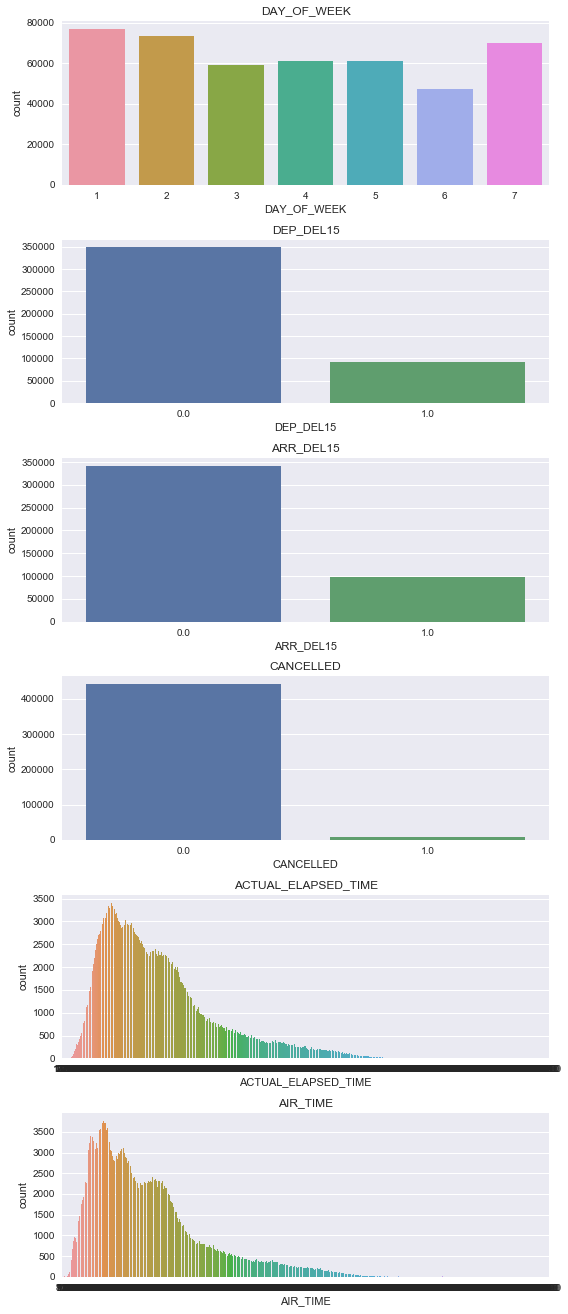

In [204]:
numeric_columns = ['DAY_OF_WEEK', 'DEP_DEL15','ARR_DEL15','CANCELLED','ACTUAL_ELAPSED_TIME',
 'AIR_TIME']

fig = plt.figure(figsize=(8,24))
for i,col in enumerate(numeric_columns):
    fig.add_subplot(8,1,i+1)
    data=df[col]
    sns.countplot(data)
    plt.title(col)
    

plt.tight_layout()    

## Finding confidence interval of our mean values of numerical features

In [202]:
def clean_data(data_list):
    clean_ls = []
    for i in data_list:
        if type(i) == int or type(i) == float:
            clean_ls.append(i)
    return np.array(clean_ls)

def confidence_interval_of_means(distribution, confidence):
    clean_distribution = clean_data(distribution)
    dist_mean = np.mean(clean_distribution)
    alpha = 1-confidence
    z = stats.norm.ppf(alpha/2)
    stderr = np.std(clean_distribution) / np.sqrt(len(clean_distribution))
    lower_bound = dist_mean + z*stderr
    upper_bound = dist_mean - z*stderr
    return lower_bound, upper_bound

In [153]:
test = np.array(df['DEP_DELAY_NEW'], dtype=pd.Series)
test2 = clean_data(test)
len(test), len(test2)

(450017, 450017)

In [226]:
confidence_interval = confidence_interval_of_means(test, 0.95)
print('The confidence interval of departure delay (in minutes) is {}'.format(confidence_interval))

The confidence interval of departure delay (in minutes) is (14.639202134781426, 14.906828348511427)


In [146]:
test[14612]

16.0

## Creating a DF for only delayed flights, to get a more normal distribution

In [192]:
delay = df[df['DEP_DEL15'] == 1]
delay.shape

(93072, 30)

In [193]:
delay_stats = delay.describe(include=[float]).T

skew_values = []
for i in delay_stats.index:

    col_skew = stats.skew(delay[i])
    skew_values.append(col_skew)
    
delay_stats['Skew'] = skew_values    
delay_stats

,count,mean,std,min,25%,50%,75%,max,Skew
DEP_DELAY_NEW,93072.0,66.523326,82.035480,15.0,24.0,41.0,78.0,2755.0,6.077014
DEP_DEL15,93072.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000
ARR_DELAY_NEW,93072.0,62.041355,82.939214,0.0,18.0,38.0,77.0,1944.0,5.447701
ARR_DEL15,92335.0,0.806780,0.394826,0.0,1.0,1.0,1.0,1.0,NaN
CANCELLED,93072.0,0.002031,0.045018,0.0,0.0,0.0,0.0,1.0,22.123437
CRS_ELAPSED_TIME,93071.0,150.842679,78.699348,21.0,90.0,132.0,185.0,712.0,NaN
ACTUAL_ELAPSED_TIME,92335.0,146.499117,78.059434,18.0,88.0,129.0,180.0,734.0,NaN
AIR_TIME,92335.0,120.467515,75.555187,10.0,64.0,102.0,152.0,698.0,NaN
CARRIER_DELAY,74494.0,25.937606,68.434031,0.0,0.0,4.0,24.0,1934.0,NaN
WEATHER_DELAY,74494.0,4.300064,31.753749,0.0,0.0,0.0,0.0,1934.0,NaN


- Still very highly skewed values for delay time (in minutes)

In [194]:
delay_test = np.array(delay['DEP_DELAY_NEW'], dtype=pd.Series)
delay_test2 = clean_data(delay_test)
len(delay_test), len(delay_test2)

(93072, 93072)

In [231]:
confidence_interval = confidence_interval_of_means(delay_test, 0.95)
print('The 0.95 confidence interval of departure delay (in minutes) is {}'.format(confidence_interval))

The 0.95 confidence interval of departure delay (in minutes) is (65.996292845519818, 67.050359208803727)


## Removing outliers for departure delay and trying for confidence interval again.

In [196]:
tukey = delay['DEP_DELAY_NEW'].mean() + 1.5*delay['DEP_DELAY_NEW'].std()
tukey

189.57654623437782

In [236]:
no_outliers['DEP_DELAY_NEW'].value_counts()

15.0     3017
16.0     2782
17.0     2643
18.0     2563
19.0     2507
20.0     2334
21.0     2096
22.0     2086
23.0     1973
24.0     1914
25.0     1852
26.0     1779
27.0     1683
28.0     1600
30.0     1528
29.0     1496
31.0     1424
32.0     1341
34.0     1334
33.0     1309
35.0     1272
36.0     1174
37.0     1142
38.0     1087
40.0     1046
39.0     1014
41.0     1008
45.0      973
42.0      961
43.0      933
         ... 
163.0      92
170.0      92
152.0      92
165.0      89
169.0      88
166.0      87
164.0      86
159.0      86
143.0      84
175.0      81
168.0      81
172.0      79
174.0      79
173.0      78
171.0      76
180.0      76
167.0      70
188.0      69
178.0      68
181.0      66
176.0      65
179.0      64
186.0      63
182.0      63
183.0      62
185.0      62
187.0      62
177.0      61
184.0      59
189.0      53
Name: DEP_DELAY_NEW, Length: 175, dtype: int64

In [235]:
no_outliers['DEP_DELAY_NEW'].mode(), no_outliers['DEP_DELAY_NEW'].mean()

(0    15.0
 dtype: float64, 52.62740406422934)

In [225]:
outliers = delay['DEP_DELAY_NEW'] > tukey
no_outliers = delay[~outliers]

no_outliers_stats = no_outliers.describe(include = [float]).T

skew_values = []
for i in no_outliers_stats.index:

    col_skew = stats.skew(no_outliers[i])
    skew_values.append(col_skew)
    
no_outliers_stats['Skew'] = skew_values    

no_outliers_stats

,count,mean,std,min,25%,50%,75%,max,Skew
DEP_DELAY_NEW,88184.0,52.627404,38.809445,15.0,24.0,39.0,69.0,189.0,1.416098
DEP_DEL15,88184.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000
ARR_DELAY_NEW,88184.0,48.488184,42.714044,0.0,17.0,36.0,68.0,446.0,1.311450
ARR_DEL15,87538.0,0.796191,0.402831,0.0,1.0,1.0,1.0,1.0,NaN
CANCELLED,88184.0,0.001724,0.041482,0.0,0.0,0.0,0.0,1.0,24.024147
CRS_ELAPSED_TIME,88183.0,151.002007,78.654168,24.0,90.0,133.0,185.0,712.0,NaN
ACTUAL_ELAPSED_TIME,87538.0,146.654733,77.962670,22.0,88.0,129.0,180.0,734.0,NaN
AIR_TIME,87538.0,120.798453,75.439613,13.0,64.0,102.0,152.0,698.0,NaN
CARRIER_DELAY,69697.0,17.517770,29.633772,0.0,0.0,4.0,22.0,189.0,NaN
WEATHER_DELAY,69697.0,2.717018,14.573940,0.0,0.0,0.0,0.0,187.0,NaN


In [198]:
outliers_test = np.array(no_outliers['DEP_DELAY_NEW'], dtype=pd.Series)
outliers_test2 = clean_data(outliers_test)
len(outliers_test), len(outliers_test2)

(88184, 88184)

In [234]:
confidence_interval = confidence_interval_of_means(outliers_test, confidence=0.95)
print('The 0.95 confidence interval of departure delay (in minutes) is {}'.format(confidence_interval))

The 0.95 confidence interval of departure delay (in minutes) is (52.37125771997102, 52.883550408487658)
